In [ ]:
#Sales Data Cleaning & Visualization

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)  # For reproducibility

dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
regions = ['North', 'South', 'East', 'West']
salespersons = ['Alex', 'Priya', 'Rohit', 'Sara']
products = ['Laptop', 'Phone', 'Tablet']

df = pd.DataFrame({
    'Date': np.random.choice(dates, 100),
    'Region': np.random.choice(regions, 100),
    'SalesPerson': np.random.choice(salespersons, 100),
    'Product': np.random.choice(products, 100),
    'Units_Sold': np.random.randint(5, 100, 100),
    'Unit_Price': np.round(np.random.uniform(200, 2000, 100), 2)
})

df['Revenue'] = df['Units_Sold'] * df['Unit_Price']


In [2]:
print(df.isnull().sum())       # Check NaNs
df.drop_duplicates(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])  # Ensure datetime format


Date           0
Region         0
SalesPerson    0
Product        0
Units_Sold     0
Unit_Price     0
Revenue        0
dtype: int64


In [3]:
region_rev = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
print(region_rev)


Region
East     1812981.79
North    1605664.96
West     1085798.16
South     801960.25
Name: Revenue, dtype: float64


In [4]:
top_salesperson = df.groupby('SalesPerson')['Revenue'].sum().sort_values(ascending=False)
print(top_salesperson)


SalesPerson
Sara     1665054.46
Priya    1464830.81
Alex     1240742.99
Rohit     935776.90
Name: Revenue, dtype: float64


In [5]:
top_product = df.groupby('Product')['Units_Sold'].sum().sort_values(ascending=False)
print(top_product)


Product
Tablet    1855
Laptop    1748
Phone     1511
Name: Units_Sold, dtype: int64


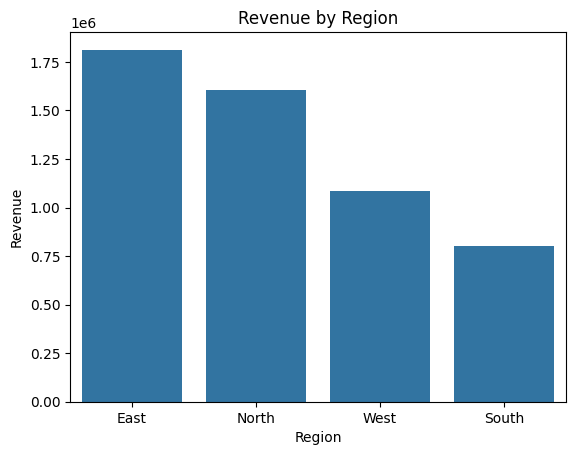

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=region_rev.index, y=region_rev.values)
plt.title('Revenue by Region')
plt.ylabel('Revenue')
plt.xlabel('Region')
plt.show()


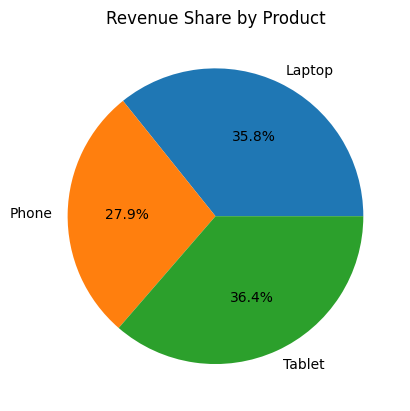

In [7]:
product_revenue = df.groupby('Product')['Revenue'].sum()
plt.pie(product_revenue, labels=product_revenue.index, autopct='%1.1f%%')
plt.title('Revenue Share by Product')
plt.show()
